# Data visualization and Data Storytelling

A common problem we have in research is to visualize data. This is both to explore our data ourselves, before we proceed to executing methods, and to display data to others, to show our results.

One perspective to tackle this visualization problem is called "data storytelling" (and you can read more about it in ["Storytelling with Data", by Cole Knaflic](https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257/ref=sr_1_1?sr=8-1)). The idea of data storytelling is focusing on the story you want to tell with data. This helps deciding what types of plots, and what information, should be within your plot.

In fact, sometimes it is better to remove some information from the plot so that the main message is conveyed more clearly. Likewise, we might want to insert some annotations in our plots to help readers understand references.

Another problem we have is to choose the medium our plot is going to be viewed: on screen, we might have the freedom to interact, zoom in and out, and so on; however, on paper (and probably in pdf format for our articles)

In this lesson, we will work with histograms, box plots, and scatter plots, which are the most common plots in scientific work. Also, we will work with geolocation plots, which are useful for many types of analyses. However, you will quickly learn that there are other kinds of plots; on those, the same principles apply.

You will probably need some references to get more help on making plots. You might refer to:


**Libraries**:

* [Matplotlib](https://matplotlib.org/): default library to make print figures.
* [Plotly](https://plotly.com/): default library to make interactive figures.

**Resources**:

* https://github.com/alanwillms/geoinfo - Latitude and longitude for cities in Brazil
* https://github.com/tbrugz/geodata-br - GeoJSON data for municipalities in Brazil


## Univariate (or: only one variable)

When we look at a single variable, we usually want to understand how it is distributed: is it unimodal or multimodal? is it skewed? Are there outliers? How does it compare with other, similar series?

The examples below use artificially-generated data to make examples of these ideas:

In [14]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt 
import pandas as pd
import requests


In [15]:


def generate_data(
    means: List[float],
    variances: List[float],
    sizes: List[int],
):
    """Generate (potentially) multimodal data"""
    x = np.concatenate([
        np.random.normal(mean, variance, size)
        for mean, variance, size in zip(means, variances, sizes)
    ])
    return x




In [16]:
# Unimodal data, centered at 10, no relevant outliers
x1 = generate_data([10], [1], [1000]) # Well-behaved - this almost never happens
x2 = generate_data([10,20], [1,1], [500, 500]) # Bimodal data
x3 = generate_data([10**(1/3)], [1], [1000])**3 # Skewed data
x4 = generate_data([10, 20], [1, 1], [990, 10]) # Data with outliers


We can visualize these data using histograms:

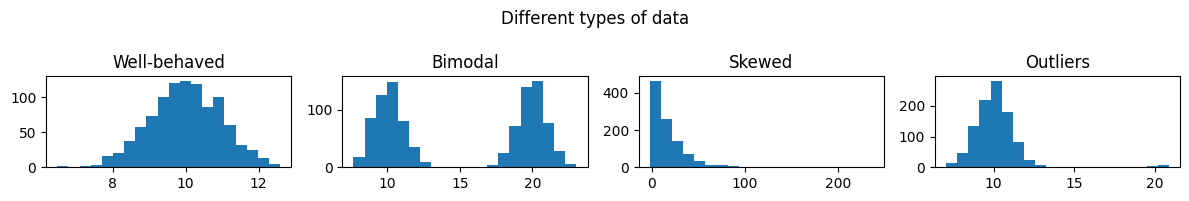

In [17]:
plt.figure(figsize=(12, 2))
plt.subplot(1, 4, 1)
plt.hist(x1, bins=20)
plt.title("Well-behaved")
plt.subplot(1, 4, 2)
plt.hist(x2, bins=20)
plt.title("Bimodal")
plt.subplot(1, 4, 3)
plt.hist(x3, bins=20)
plt.title("Skewed")
plt.subplot(1, 4, 4)
plt.hist(x4, bins=20)
plt.title("Outliers")
plt.suptitle('Different types of data')
plt.tight_layout()
plt.show()


In [18]:
df_gdp = pd.read_csv(
    'data.csv',
    sep=';',
    encoding='utf8',
    skiprows=3,
    skipfooter=12,
    engine='python',
    decimal=',',
)
df_gdp.head()

,Município,PIB_per_capita
0,350010 ADAMANTINA,22168.60
1,350020 ADOLFO,19727.55
2,350030 AGUAI,19361.12
3,350040 AGUAS DA PRATA,15175.01
4,350050 AGUAS DE LINDOIA,20375.06


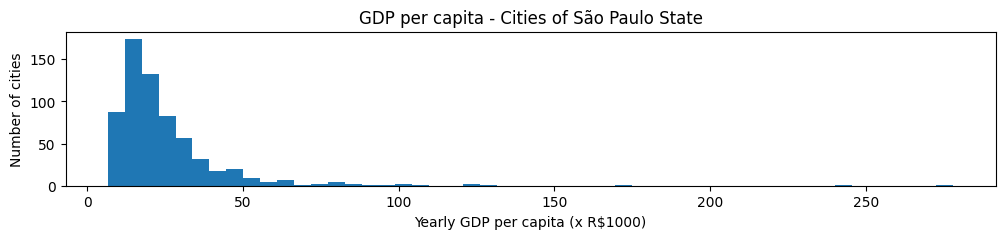

In [19]:
plt.figure(figsize=(12, 2))
plt.hist(df_gdp['PIB_per_capita']/1e3, bins=50)
plt.title("GDP per capita - Cities of São Paulo State")
plt.xlabel('Yearly GDP per capita (x R$1000)' )
plt.ylabel('Number of cities')
plt.show()

## Exercise 1: histograms

Make a histogram for the illiteracy rate for cities of São Paulo. Is it well-behaved? Skewed? Bimodal? Are there outliers?

In [20]:
# Make your solution here
df_illiteracy = pd.read_csv(
    'illiteracy_rate.csv',
    sep=';',
    encoding='utf8',
    skiprows=3,
    skipfooter=12,
    engine='python',
    decimal=',',
)
df_illiteracy.head()

# Continue from here

,Município,Taxa_de_analfabetismo
0,350010 ADAMANTINA,5.8
1,350020 ADOLFO,7.8
2,350030 AGUAI,8.3
3,350040 AGUAS DA PRATA,5.3
4,350050 AGUAS DE LINDOIA,5.9


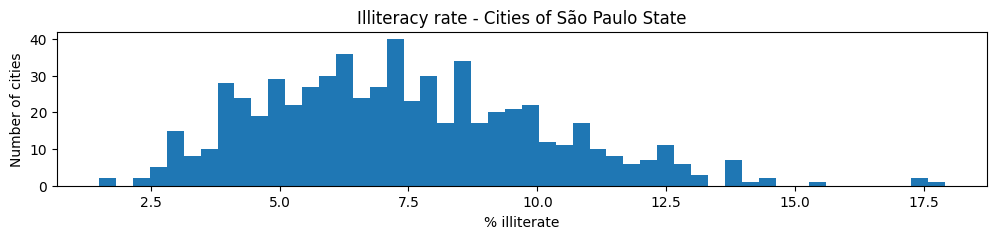

In [ ]:
# This is my solution. Do NOT look at it before doing yours. Also, do NOT copy it.








df_illiteracy = pd.read_csv(
    'illiteracy_rate.csv',
    sep=';',
    encoding='utf8',
    skiprows=3,
    skipfooter=12,
    engine='python',
    decimal=',',
)
df_illiteracy.head()

plt.figure(figsize=(12, 2))
plt.hist(df_illiteracy['Taxa_de_analfabetismo'], bins=50)
plt.title("Illiteracy rate - Cities of São Paulo State")
plt.xlabel('% illiterate' )
plt.ylabel('Number of cities')
plt.show()

## Saving a figure

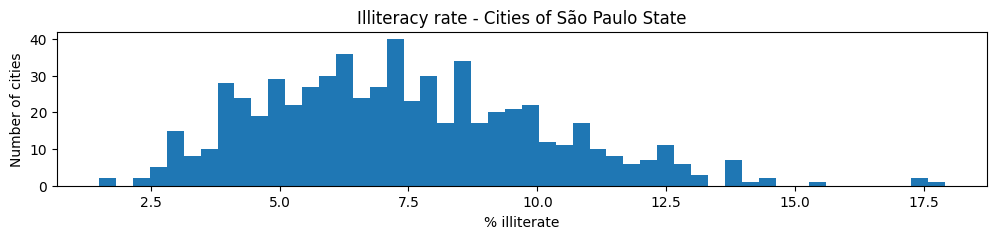

In [55]:
plt.figure(figsize=(12, 2))
plt.hist(df_illiteracy['Taxa_de_analfabetismo'], bins=50)
plt.title("Illiteracy rate - Cities of São Paulo State")
plt.xlabel('% illiterate' )
plt.ylabel('Number of cities')
plt.savefig('output.png', dpi=300, bbox_inches='tight')

## Exercise 2: box plots

A nice plot to compare two distributions is the Box Plot. The idea of the box plot is to mark some key points in your data distribution:

1. The vertical axis has the same role as the horizontal axis in histograms
1. The box contains 50% of the data (it goes from the 25-percentile to the 75-percentile)
1. The line within the box marks the median
1. The whiskers mark the range in which we consider data to be non-outliers (Matplotlib's default is using 1.5 times the inter quartile range)
1. The loose points represent outliers

Boxplots lose some detail when compared to histograms (for example, it is harder to spot multimodal data in boxplots). However, they are useful for comparing different data series.

In the boxplot below, identify each of the key landmarks cited above;


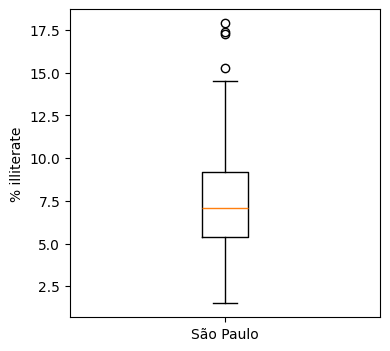

In [22]:
plt.figure(figsize=(4, 4))
plt.boxplot(df_illiteracy['Taxa_de_analfabetismo'])
plt.xticks([1], ['São Paulo'])
plt.ylabel('% illiterate')
plt.show()

## Exercise 3: scatter plots

So far, we have looked at one single variable at each time. However, sometimes, we want to understand how two variables are linked to each other.

One of the methods for such is the Scatter Plot.

Before we proceed, let's remember how to merge two dataframes, so we can have multivariate data:

In [23]:
df_gdp_illiteracy = pd.merge(df_gdp, df_illiteracy, on='Município')
df_gdp_illiteracy.head()

,Município,PIB_per_capita,Taxa_de_analfabetismo
0,350010 ADAMANTINA,22168.60,5.8
1,350020 ADOLFO,19727.55,7.8
2,350030 AGUAI,19361.12,8.3
3,350040 AGUAS DA PRATA,15175.01,5.3
4,350050 AGUAS DE LINDOIA,20375.06,5.9


Now, we can calculate, for example, the correlation between these two elements:

In [56]:
df_gdp_illiteracy[['PIB_per_capita', 'Taxa_de_analfabetismo']].corr()

,PIB_per_capita,Taxa_de_analfabetismo
PIB_per_capita,1.000000,-0.335102
Taxa_de_analfabetismo,-0.335102,1.000000


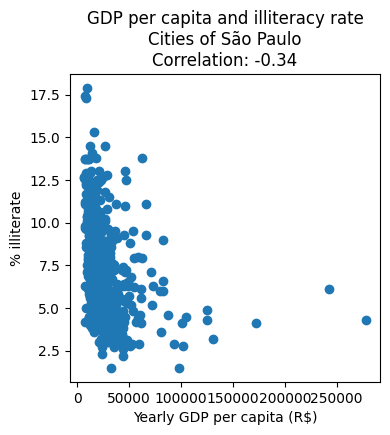

In [59]:
plt.figure(figsize=(4, 4))
corr = df_gdp_illiteracy[['PIB_per_capita', 'Taxa_de_analfabetismo']].corr().iloc[0,1]
plt.scatter(df_gdp_illiteracy['PIB_per_capita'], df_gdp_illiteracy['Taxa_de_analfabetismo'])
plt.title(f'GDP per capita and illiteracy rate\nCities of São Paulo\nCorrelation: {corr:.2f}')
plt.xlabel('Yearly GDP per capita (R$)')
plt.ylabel('% illiterate')
plt.show()

## Exercise 4: geographic visualization

One important aspect about human occupations is that they always have a time and a place. In other words: the reasons underlying human occupations are strongly linked to the history of how people dwelled particular lands.

In this next plot, we will go step by step on how to plot geographic data.

First, we get latitude and longitude of cities in Brazil:

In [60]:
df_geo = pd.read_csv('municipios.csv')
df_geo['codigo'] = df_geo['codigo_ibge'].astype(str).str[:-1]
df_geo.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,codigo
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,520005
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,310010
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,520010
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,310020
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,150010


Now, we will need to *merge* these two datasets. For such, we need a common identifier. We will use the municipality code:

In [40]:
df_gdp_illiteracy['codigo'] = df_gdp_illiteracy['Município'].astype(str).str[:6]
df_gdp_illiteracy.head()

,Município,PIB_per_capita,Taxa_de_analfabetismo,codigo
0,350010 ADAMANTINA,22168.60,5.8,350010
1,350020 ADOLFO,19727.55,7.8,350020
2,350030 AGUAI,19361.12,8.3,350030
3,350040 AGUAS DA PRATA,15175.01,5.3,350040
4,350050 AGUAS DE LINDOIA,20375.06,5.9,350050


Then, we actually merge data:

In [41]:
df_with_geo = pd.merge(df_gdp_illiteracy, df_geo, on='codigo')
df_with_geo.head()

,Município,PIB_per_capita,Taxa_de_analfabetismo,codigo,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,350010 ADAMANTINA,22168.60,5.8,350010,3500105,Adamantina,-21.6820,-51.0737,0,35,6101,18,America/Sao_Paulo
1,350020 ADOLFO,19727.55,7.8,350020,3500204,Adolfo,-21.2325,-49.6451,0,35,6103,17,America/Sao_Paulo
2,350030 AGUAI,19361.12,8.3,350030,3500303,Aguaí,-22.0572,-46.9735,0,35,6105,19,America/Sao_Paulo
3,350040 AGUAS DA PRATA,15175.01,5.3,350040,3500402,Águas da Prata,-21.9319,-46.7176,0,35,6107,19,America/Sao_Paulo
4,350050 AGUAS DE LINDOIA,20375.06,5.9,350050,3500501,Águas de Lindóia,-22.4733,-46.6314,0,35,6109,19,America/Sao_Paulo


Last, we will use the Plotly Express library to plot our cities over a map:

In [63]:
import plotly.express as px

fig = px.scatter_mapbox(df_with_geo,
                        width=800,
                        height=600,
                        lat='latitude',
                        lon='longitude',
                        hover_name='Município',
                        size='PIB_per_capita',
                        color='Taxa_de_analfabetismo',
                        mapbox_style="open-street-map",
                        title='Cities of São Paulo State: GDP per capita and Illiteracy Rate',
                        size_max=15,
                        zoom=5,)

fig.show()


A really cool thing we can do with plotly is that we can export an interactive plot as HTML, so we can open it later in our browser:

In [54]:
fig = px.scatter_mapbox(df_with_geo,
                        width=800,
                        height=600,
                        lat='latitude',
                        lon='longitude',
                        hover_name='Município',
                        size='PIB_per_capita',
                        color='Taxa_de_analfabetismo',
                        mapbox_style="open-street-map",
                        title='Cities of São Paulo State: GDP per capita and Illiteracy Rate',
                        size_max=15,
                        zoom=5,)
with open('map.html', 'w') as f:
    f.write(fig.to_html())


Take a look at the map.

What can we tell about illiteracy rates from the map, that we cannot see in our previous plots?

## Review and exercises

At this point, you should have used:

* Making figures
* Saving figures
* Making interactive maps
* Saving interactive maps

Now, let's proceed to some exercises:

In [ ]:
# Challenge 1
# Make a histogram of the heights of everyone in your classroom.

In [ ]:
# Challenge 2
# Looking at the geographical distribution of illiteracy rates in São Paulo, it seems that moving towards west
# (away from the capital) seems to increase the illiteracy rate. Make figures to support or deny this hypothesis. 

In [ ]:
# Challenge 3
# Replicate the GDP per capita and illiteracy rate analysis for all cities in Brazil and export a webpage with the interactive map.

In [ ]:
# Challenge 4
# Go back to the ENEM database we had last class. Make a scatter plot of the average score 
# in the ENEM test for each city and their illiteracy rates and GDP per capita. Are they correlated?

In [ ]:
# Challenge 4
# Make an interactive map showing the average ENEM grade for all cities in Brazil.
# Can you identify poles of excellence and lack of education?